In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [12]:
im = plt.imread(r'../../Downloads/red_new.jpg')
imGray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
imEdge = cv2.Canny(im, 150, 250)


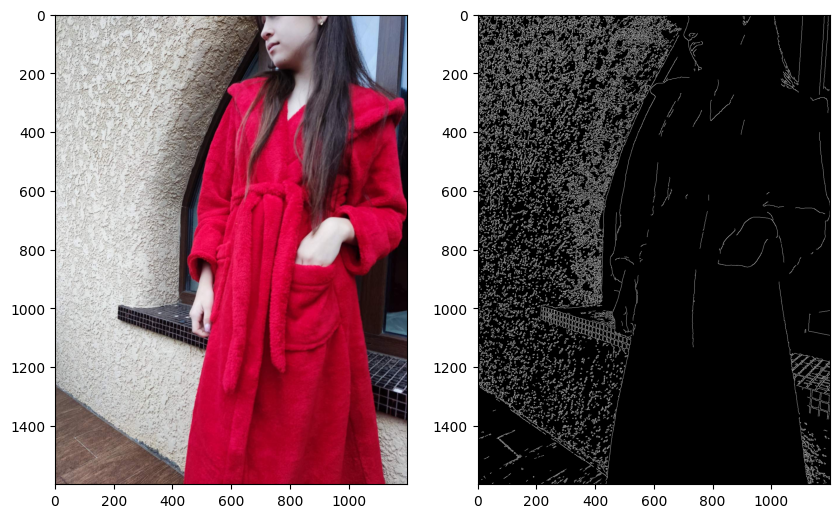

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(im, cmap='gray')
ax2.imshow(imEdge, cmap='gray')

# GAUSSIAN FILTER

In [14]:
x = 0
y = -1
sigma = 1
v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
v

0.09653235263005391

In [15]:
def f_getGaussianFilter(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    G = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = v
    return G

In [16]:
G = f_getGaussianFilter(11,2)

In [17]:
G

array([[7.68103295e-05, 2.36592471e-04, 5.67555834e-04, 1.06033389e-03,
        1.54277671e-03, 1.74819504e-03, 1.54277671e-03, 1.06033389e-03,
        5.67555834e-04, 2.36592471e-04, 7.68103295e-05],
       [2.36592471e-04, 7.28756116e-04, 1.74819504e-03, 3.26605832e-03,
        4.75208682e-03, 5.38481983e-03, 4.75208682e-03, 3.26605832e-03,
        1.74819504e-03, 7.28756116e-04, 2.36592471e-04],
       [5.67555834e-04, 1.74819504e-03, 4.19370190e-03, 7.83486662e-03,
        1.13996637e-02, 1.29175112e-02, 1.13996637e-02, 7.83486662e-03,
        4.19370190e-03, 1.74819504e-03, 5.67555834e-04],
       [1.06033389e-03, 3.26605832e-03, 7.83486662e-03, 1.46374579e-02,
        2.12973755e-02, 2.41330882e-02, 2.12973755e-02, 1.46374579e-02,
        7.83486662e-03, 3.26605832e-03, 1.06033389e-03],
       [1.54277671e-03, 4.75208682e-03, 1.13996637e-02, 2.12973755e-02,
        3.09874986e-02, 3.51134361e-02, 3.09874986e-02, 2.12973755e-02,
        1.13996637e-02, 4.75208682e-03, 1.54277671e-

In [18]:
np.sum(G)

0.9891178756586588

In [19]:
cv2.getGaussianKernel?

Docstring:
getGaussianKernel(ksize, sigma[, ktype]) -> retval
.   @brief Returns Gaussian filter coefficients.
.   
.   The function computes and returns the \f$\texttt{ksize} \times 1\f$ matrix of Gaussian filter
.   coefficients:
.   
.   \f[G_i= \alpha *e^{-(i-( \texttt{ksize} -1)/2)^2/(2* \texttt{sigma}^2)},\f]
.   
.   where \f$i=0..\texttt{ksize}-1\f$ and \f$\alpha\f$ is the scale factor chosen so that \f$\sum_i G_i=1\f$.
.   
.   Two of such generated kernels can be passed to sepFilter2D. Those functions automatically recognize
.   smoothing kernels (a symmetrical kernel with sum of weights equal to 1) and handle them accordingly.
.   You may also use the higher-level GaussianBlur.
.   @param ksize Aperture size. It should be odd ( \f$\texttt{ksize} \mod 2 = 1\f$ ) and positive.
.   @param sigma Gaussian standard deviation. If it is non-positive, it is computed from ksize as
.   `sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8`.
.   @param ktype Type of filter coefficients. It can be CV_3

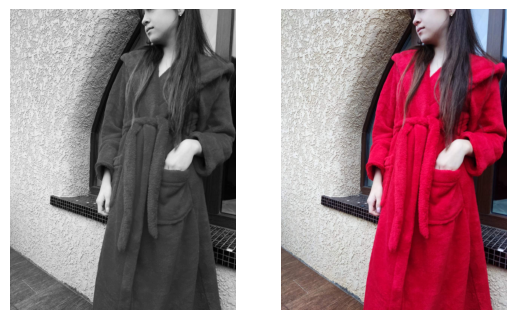

In [22]:
G = f_getGaussianFilter(3,0.5)
img_S = cv2.filter2D(im,-1,G)
plt.subplot(121)
plt.imshow(imGray,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_S,cmap='gray')
plt.axis('off')
plt.show()

In [23]:
img_S = img_S[:,:,0]
mask_x = np.zeros((2,1))
mask_x[0] = -1
mask_x[1] = 1

In [24]:
mask_x

array([[-1.],
       [ 1.]])

In [25]:
img_S = np.float64(img_S)
Ix = cv2.filter2D(img_S,-1,mask_x)
mask_y = mask_x.T
Iy = cv2.filter2D(img_S,-1,mask_y)

In [26]:
Ix.dtype

dtype('float64')

In [27]:
Iy.shape

(1600, 1200)

In [28]:
img_S.shape

(1600, 1200)

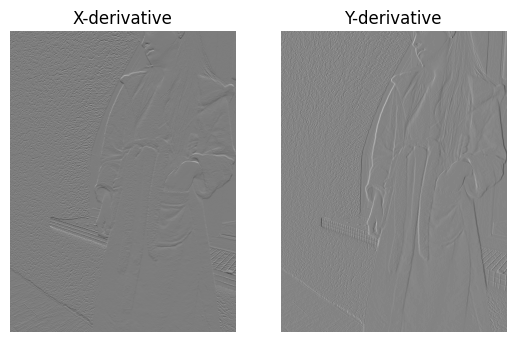

In [29]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.title('X-derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.title('Y-derivative')
plt.axis('off')
plt.show()

In [30]:
gv = np.array([Ix[150,130],Iy[150,130]])

In [31]:
gv

array([27.,  0.])

In [32]:
Ix.dtype

dtype('float64')